In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [73]:
root = (os.path.abspath(os.path.join(os.getcwd(), "../")))
events = pd.read_csv(root+'/data/GraceDB.csv')
events

,Event ID,date,time,comment,flatten_skymap,moc_skymap
0,S190405ar,2019/4/5,16:01:30,RETRACTED,NaN,NaN
1,S190408an,2019/4/8,18:18:02,NORMAL,GW190408_181802_PublicationSamples_flattened.f...,GW190408_181802_PublicationSamples.multiorder....
2,S190412m,2019/4/12,5:30:44,NORMAL,GW190412_PublicationSamples_flattened.fits.gz,GW190412_PublicationSamples.multiorder.fits
3,S190421ar,2019/4/21,21:38:56,NORMAL,GW190421_213856_PublicationSamples_flattened.f...,GW190421_213856_PublicationSamples.multiorder....
4,S190425z,2019/4/25,8:18:05,NORMAL,GW190425_PublicationSamples_flattened.fits.gz,GW190425_PublicationSamples.multiorder.fits
...,...,...,...,...,...,...
75,S200302c,2-Mar-20,1:58:11,NORMAL,LALInference.fits.gz,LALInference.multiorder.fits
76,S200303ba,3-Mar-20,12:15:48,RETRACTED,NaN,NaN
77,S200308e,8-Mar-20,1:19:27,RETRACTED,NaN,NaN
78,S200311bg,11-Mar-20,11:58:53,NORMAL,LALInference.fits.gz,LALInference.multiorder.fits


In [74]:
from datetime import datetime
# 转换时间
events = events.astype({'date':'string','time':'string'})   #转换
events['DATE'] = events['date']+" "+events['time']
events['date'] = pd.to_datetime(events['date'])
events['DATE'] = pd.to_datetime(events['DATE'])

events

,Event ID,date,time,comment,flatten_skymap,moc_skymap,DATE
0,S190405ar,2019-04-05,16:01:30,RETRACTED,NaN,NaN,2019-04-05 16:01:30
1,S190408an,2019-04-08,18:18:02,NORMAL,GW190408_181802_PublicationSamples_flattened.f...,GW190408_181802_PublicationSamples.multiorder....,2019-04-08 18:18:02
2,S190412m,2019-04-12,5:30:44,NORMAL,GW190412_PublicationSamples_flattened.fits.gz,GW190412_PublicationSamples.multiorder.fits,2019-04-12 05:30:44
3,S190421ar,2019-04-21,21:38:56,NORMAL,GW190421_213856_PublicationSamples_flattened.f...,GW190421_213856_PublicationSamples.multiorder....,2019-04-21 21:38:56
4,S190425z,2019-04-25,8:18:05,NORMAL,GW190425_PublicationSamples_flattened.fits.gz,GW190425_PublicationSamples.multiorder.fits,2019-04-25 08:18:05
...,...,...,...,...,...,...,...
75,S200302c,2020-03-02,1:58:11,NORMAL,LALInference.fits.gz,LALInference.multiorder.fits,2020-03-02 01:58:11
76,S200303ba,2020-03-03,12:15:48,RETRACTED,NaN,NaN,2020-03-03 12:15:48
77,S200308e,2020-03-08,1:19:27,RETRACTED,NaN,NaN,2020-03-08 01:19:27
78,S200311bg,2020-03-11,11:58:53,NORMAL,LALInference.fits.gz,LALInference.multiorder.fits,2020-03-11 11:58:53


In [75]:
# 查找retraced的数据的索引
retraced = list(events[events['comment']=='RETRACTED'].index)
normal = list(events[events['comment']=='NORMAL'].index)
print('可用{}条，撤回{}条'.format(len(normal),len(retraced)))

可用57条，撤回23条


In [76]:
# day = [0]*31
# for i in events['date'][normal]:
#     temp = i.day;
#     day[temp-1] = day[temp-1] + 1
# day

In [77]:
# 求引力波爆发的间隔
interval = [0]*(len(normal)-1)
temp = [0]*(len(normal)-1)
events.sort_values(by='DATE')
for i in range(len(normal)-1):
    temp[i] = events['DATE'][normal[i+1]]-events['DATE'][normal[i]]
    interval[i] = temp[i].days * 24 * 60 * 60 + temp[i].seconds

### 是否服从正态分布？

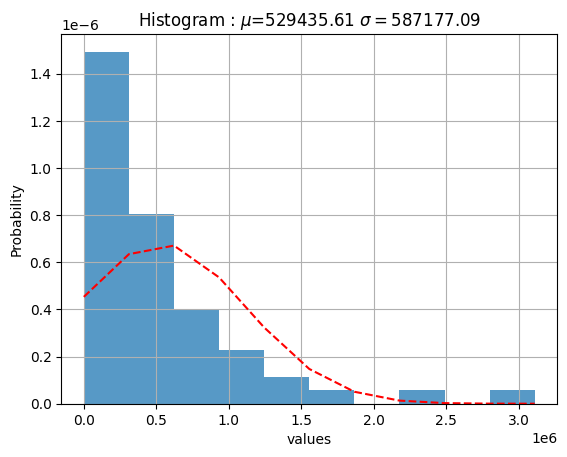

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib.mlab as mlab
from scipy.stats import norm
 
 
x = np.array(interval) #这里填入你的数据list 如果已经是array格式就不用转化了
#n, bins, patches = plt.hist(x, 20, density=1, facecolor='blue', alpha=0.75)  #第二个参数是直方图柱子的数量
mu =np.mean(x) #计算均值 
sigma =np.std(x) 
num_bins = 10 #直方图柱子的数量 
n, bins, patches = plt.hist(x, num_bins,density=1, alpha=0.75) 
#直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象 
y = norm.pdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y 
 
plt.grid(True)
plt.plot(bins, y, 'r--') #绘制y的曲线 
plt.xlabel('values') #绘制x轴 
plt.ylabel('Probability') #绘制y轴 
plt.title('Histogram : $\mu$=' + str(round(mu,2)) + ' $\sigma=$'+str(round(sigma,2)))  #中文标题 u'xxx' 
#plt.subplots_adjust(left=0.15)#左边距 
plt.show()



In [79]:
# 服从正态分布？
from scipy import stats
import matplotlib.pylab as plt
%matplotlib inline
u = np.mean(interval)
std = np.std(interval)

stats.kstest(interval,'norm',(u,std)) 
# print(u)

KstestResult(statistic=0.18549253241594243, pvalue=0.036895362928087705, statistic_location=651537, statistic_sign=1)

### 不服从正态分布。

In [80]:
def seconds_to_dhms(seconds):
    def _days(day):
        return "{}d ".format(day) if day >= 1 else "00d, ".format(day)
    def _hours(hour):  
        return "{}h ".format(hour) if hour >= 1 else "00h, ".format(hour)
    def _minutes(minute):
        return "{}m ".format(minute) if minute >= 1 else "00m ".format(minute)
    def _seconds(second):  
        return "{}s".format(second) if second >= 1 else "00s".format(second)          
    days = int(seconds // (3600 * 24))
    hours = int((seconds // 3600) % 24)
    minutes = int((seconds // 60) % 60)
    seconds = int(np.round(seconds % 60))
    if days > 0 :
        return _days(days)+_hours(hours)+_minutes(minutes)+_seconds(seconds)
    if hours > 0 :
        return _hours(hours)+_minutes(minutes)+_seconds(seconds)
    if minutes > 0 :
        return _minutes(minutes)+_seconds(seconds)
    return _seconds(seconds)

# for i in interval:
#     print(seconds_to_dhms(i))
print("平均每{}爆发一次，方差为{}".format(seconds_to_dhms(mu),seconds_to_dhms(sigma)))

平均每6d 3h 3m 56s爆发一次，方差为6d 19h 6m 17s


### 使用distfit自动拟合分布

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.11493e-12] [loc=529435.607 scale=587177.094]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1.88073e-14] [loc=1264.000 scale=528171.607]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 2.86893e-14] [loc=-4256206.241 scale=4257470.241]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 8.90597e-13] [loc=418185.077 scale=386838.843]
[distfit] >INFO> [t         ] [0.10 sec] [RSS: 6.24471e-13] [loc=371789.716 scale=305790.100]
[distfit] >INFO> [genextreme] [0.16 sec] [RSS: 2.95432e-12] [loc=1267.070 scale=21.423]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 3.66694e-12] [loc=3110474.000 scale=8.925]
[distfit] >INFO> [lognorm   ] [0.07 sec] [RSS: 2.91981e-12] [loc=1264.000 scale=13.307]
[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 6.25286e-14] [loc=1264.000 scale=70327129.181]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 2.42563e-12] [loc=1264.000 scale=3109210.000]
[distfit] >INFO> [loggamma  

[pypickle] Pickle file saved: [interval_generator.pkl]


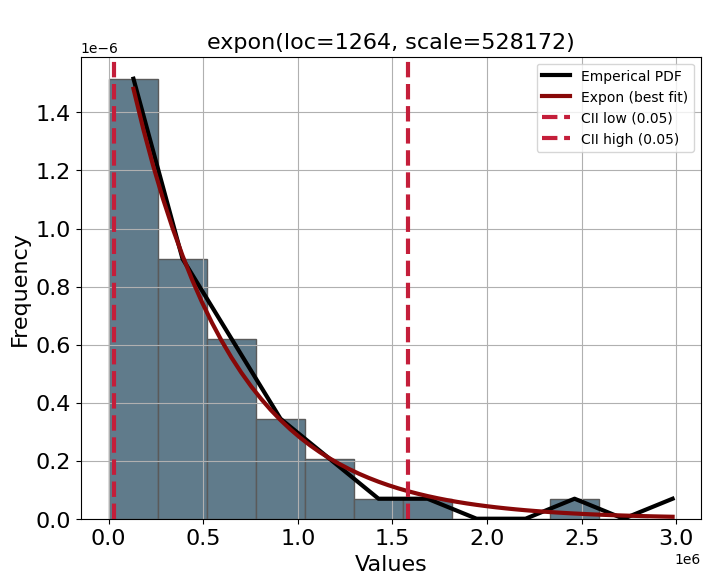

In [81]:
from distfit import distfit
import numpy as np
# X = np.random.normal(0, 2, [100,10])
dist = distfit(todf=True)
dist.fit_transform(np.array(interval))
dist.plot(figsize=(8,6))#xlim=(0,3.5*1e6)
dist.save('interval_generator.pkl')

# 作者：章北海mlpy
# 链接：https://www.zhihu.com/question/284452109/answer/2265676342
# 来源：知乎
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [82]:
sumarry = dist.summary
sumarry

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,expon,0.0,1264.0,528171.607143,(),"(1264.0, 528171.6071428572)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,pareto,0.0,-4256206.240868,4257470.240868,"(9.054360751774883,)","(9.054360751774883, -4256206.240868166, 425747...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,beta,0.0,1264.0,70327129.180615,"(0.7753417002619418, 94.66482798574084)","(0.7753417002619418, 94.66482798574084, 1263.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,t,0.0,371789.716299,305790.099846,"(2.4127321764682392,)","(2.4127321764682392, 371789.71629896795, 30579...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,dweibull,0.0,418185.077156,386838.843042,"(1.0183752339299217,)","(1.0183752339299217, 418185.07715590124, 38683...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,norm,0.0,529435.607143,587177.094005,(),"(529435.6071428572, 587177.0940048873)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,loggamma,0.0,-155440149.590174,21843132.291494,"(1262.480766918618,)","(1262.480766918618, -155440149.59017396, 21843...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,uniform,0.0,1264.0,3109210.0,(),"(1264.0, 3109210.0)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,lognorm,0.0,1264.0,13.306952,"(9.413362907246603,)","(9.413362907246603, 1263.9999999999998, 13.306...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,genextreme,0.0,1267.069648,21.423226,"(-6.97904758093887,)","(-6.97904758093887, 1267.069647540572, 21.4232...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


In [83]:
# distfit最优分布为指数分布，(loc,scale)=(1264.0, 528171.6071428572)
stats.kstest(interval,'expon',(1264.0, 528171.6071428572))

KstestResult(statistic=0.12653962434124932, pvalue=0.3050051082332135, statistic_location=127605, statistic_sign=1)

#### 经过ks检验，得pvalue = 0.35>0.05，因此不能拒绝零假设，interval符合指数分布

### 使用Fitter对指数分布的拟合参数相同

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00, 16.59it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,2.564003e-11,3228.109508,-1583.033509,inf,0.126540,3.050051e-01
t,3.435745e-11,3350.061278,-1562.618972,inf,0.165437,8.292172e-02
gamma,5.805458e-11,inf,-1533.243338,NaN,0.982143,2.526391e-98


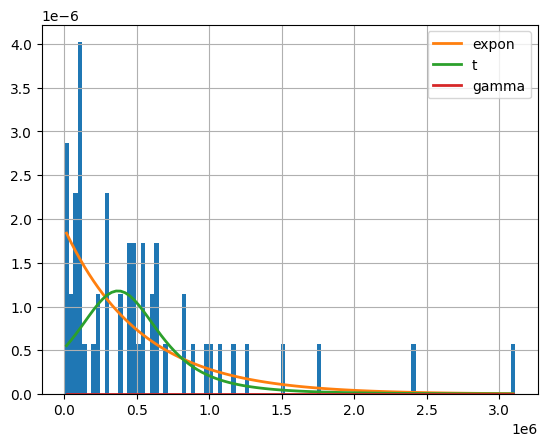

In [84]:
from fitter import Fitter
f = Fitter(interval,distributions=['expon','gamma','t'])  # 创建Fitter类 ,distributions=['norm', 'expon', 'uniform']
f.fit()  # 调用fit函数拟合分布
f.summary()  # 输出拟合结果

In [85]:
f.fitted_param['expon']

(1264.0, 528171.6071428572)

In [86]:
# f.fitted_pdf['exponweib']
f.get_best()

{'expon': {'loc': 1264.0, 'scale': 528171.6071428572}}

In [87]:
stats.kstest(interval,'exponweib',(0.733614691304483, 1.0296256410996327, 1263.9999999999998, 672184.6920331989))

KstestResult(statistic=0.08557528146156634, pvalue=0.7746976985925869, statistic_location=400163, statistic_sign=-1)

In [88]:
stats.anderson(interval, dist='expon')

AndersonResult(statistic=0.5555478284176942, critical_values=array([0.912, 1.067, 1.327, 1.589, 1.936]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=529435.6071428572)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### 重新画图，比较拟合出分布的概率密度函数与原来数据比较

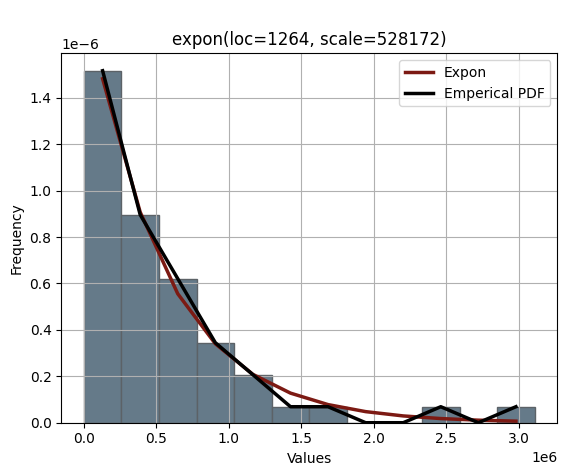

In [89]:
import math

mu = 1264.0
scale = 528171.607142857
mid = (np.max(interval)-np.min(interval))/12


n, bins, patches = plt.hist(interval, 12, density=1,color = '#657A89',edgecolor = '#5C6267')
plt.title('\nexpon(loc=1264, scale=528172)')
plt.grid()
plt.xlabel("Values")
plt.ylabel('Frequency')
# y,edges = np.histogram()

# X = np.arange(mid/2,3.2*1e6,mid)
X=[]
for i in range(len(bins)-1):
    X.append((bins[i+1]-bins[i])/2)
X = bins[0:-1]+X
# y = [lambda X: 1/scale * ( math.exp(-(x-mu)/scale) ) for x in X]
Y = lambda x: 1/scale * ( math.exp(-(x-mu)/scale) )
y = []
for i in range(len(X)):
    y.append(Y(X[i]))
plt.plot(X,y,'#7C1A13',linewidth=2.5,label = 'Expon')
plt.plot(X,n,'black',linewidth=2.5,label='Emperical PDF')
plt.legend()

### 采样

In [90]:
### 用distfit拟合出的指数分布进行采样
# 使用轮盘赌进行采样
import random 
def sample(X, dist):
    #prob = random.random()
    x = random.random()*3.5*1e6
    p = dist.predict(x)['y_proba']
    if p>=random.random(): #轮盘赌
        X.append(x)
    return X

X = []
while len(X)!=57:
    sample(X, dist)
X

[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Compute signifi

[688484.5150270002,
 1617261.264416408,
 319519.51485328545,
 812272.1519403869,
 162924.94084114904,
 1242323.9487459585,
 796176.7836681199,
 1262256.5348122804,
 683973.4537543058,
 611637.0435331932,
 1034458.6318953568,
 304553.9072414994,
 1845147.8529695817,
 704983.917103853,
 1099702.25640837,
 1180920.3410042534,
 239602.07947848062,
 682555.7563504936,
 1012765.7007985143,
 417130.3367723673,
 469636.2084172933,
 1083131.0774837814,
 1135603.5057492591,
 686647.3155462061,
 373944.3401037412,
 469396.96842577524,
 357495.9189405847,
 522179.2807658446,
 859078.9170894502,
 698647.8286778715,
 201203.0847630785,
 77788.64600859492,
 1714614.1763385816,
 228984.77013566165,
 660036.4664016898,
 339877.16638423916,
 523220.3646849084,
 1146443.6068510613,
 349143.11126605433,
 487606.55112496385,
 795128.3027337767,
 684261.3076941039,
 413371.48587986786,
 436106.6335672707,
 1066063.9717993035,
 420707.81991608744,
 218235.76312754923,
 339079.55845846666,
 607616.7037507809,

In [91]:
x_sample= []
for i in X:
    x_sample.append(seconds_to_dhms(i))
x_sample

['7d 23h 14m 45s',
 '18d 17h 14m 21s',
 '3d 16h 45m 20s',
 '9d 9h 37m 52s',
 '1d 21h 15m 25s',
 '14d 9h 5m 24s',
 '9d 5h 9m 37s',
 '14d 14h 37m 37s',
 '7d 21h 59m 33s',
 '7d 1h 53m 57s',
 '11d 23h 20m 59s',
 '3d 12h 35m 54s',
 '21d 8h 32m 28s',
 '8d 3h 49m 44s',
 '12d 17h 28m 22s',
 '13d 16h 2m 00s',
 '2d 18h 33m 22s',
 '7d 21h 35m 56s',
 '11d 17h 19m 26s',
 '4d 19h 52m 10s',
 '5d 10h 27m 16s',
 '12d 12h 52m 11s',
 '13d 3h 26m 44s',
 '7d 22h 44m 7s',
 '4d 7h 52m 24s',
 '5d 10h 23m 17s',
 '4d 3h 18m 16s',
 '6d 1h 2m 59s',
 '9d 22h 37m 59s',
 '8d 2h 4m 8s',
 '2d 7h 53m 23s',
 '21h 36m 29s',
 '19d 20h 16m 54s',
 '2d 15h 36m 25s',
 '7d 15h 20m 36s',
 '3d 22h 24m 37s',
 '6d 1h 20m 20s',
 '13d 6h 27m 24s',
 '4d 00h, 59m 3s',
 '5d 15h 26m 47s',
 '9d 4h 52m 8s',
 '7d 22h 4m 21s',
 '4d 18h 49m 31s',
 '5d 1h 8m 27s',
 '12d 8h 7m 44s',
 '4d 20h 51m 48s',
 '2d 12h 37m 16s',
 '3d 22h 11m 20s',
 '7d 00h, 46m 57s',
 '13d 9h 43m 5s',
 '18d 17h 24m 43s',
 '7d 00h, 17m 31s',
 '10d 16h 34m 3s',
 '5d 20h 

In [92]:
dist

In [96]:
dfit = distfit()
dfit.load('interval_generator.pkl')

[pypickle] Pickle file loaded: [interval_generator.pkl]


In [ ]:
dfit.predict()